# 3. Data Cleansing

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify_prep.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class,release_year,release_month
0,6f807x0ima9a1j3VPbc7VN,I Dont Care with Justin Bieber Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Dont Care with Justin Bieber Loud Luxury Remix,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,60–80,2019,6
1,0r7CVbZTWZgbTCYdfa2P31,Memories Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories Dillon Francis Remix,2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,60–80,2019,12
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time Don Diablo Remix,2019-05-07,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,60–80,2019,5
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,40–60,2019,7
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved Future Humans Remix,2019-05-03,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,60–80,2019,5


In [ ]:
df.shape

(32833, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32823 non-null  object 
 2   track_artist              32825 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32819 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

My continous categories are:

* danceability
* energy
* loudness
* acousticness  
* instrumentalness  
* liveness  
* speechiness  
* valence  
* tempo  
* duration_ms  
* track_popularity   ← (target)



In [ ]:
cols= [
'danceability',
'energy',
'loudness',
'acousticness',
'instrumentalness',
'liveness',
'speechiness',
'valence',
'tempo',
'duration_ms',
'track_popularity'
]
con_df = df[cols]
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32833 non-null  float64
 1   energy            32833 non-null  float64
 2   loudness          32833 non-null  float64
 3   acousticness      32833 non-null  float64
 4   instrumentalness  32833 non-null  float64
 5   liveness          32833 non-null  float64
 6   speechiness       32833 non-null  float64
 7   valence           32833 non-null  float64
 8   tempo             32833 non-null  float64
 9   duration_ms       32833 non-null  int64  
 10  track_popularity  32833 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 2.8 MB


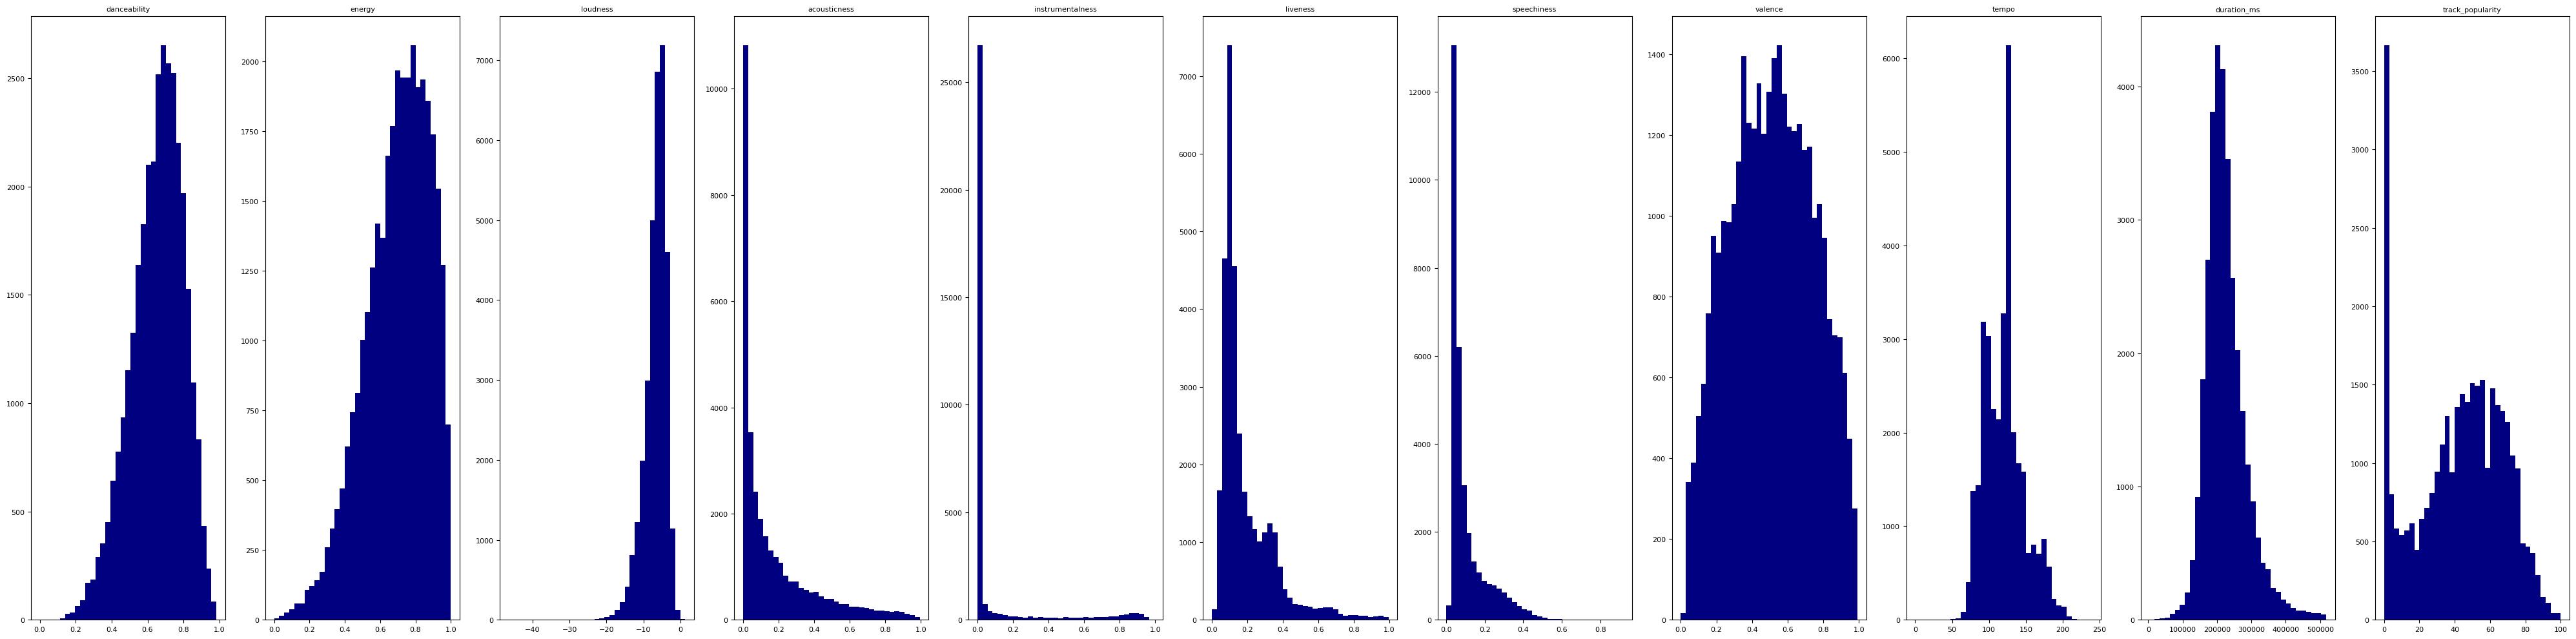

In [ ]:
# Customize histogram plotting
fig, axes = plt.subplots(1, len(con_df.columns), figsize=(40, 10))
for i, col in enumerate(con_df.columns):
    axes[i].hist(con_df[col], bins=35, color="navy")
    axes[i].set_title(col, fontsize=8)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()

# Missing data

In [ ]:
df.isnull().head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity_class,release_year,release_month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

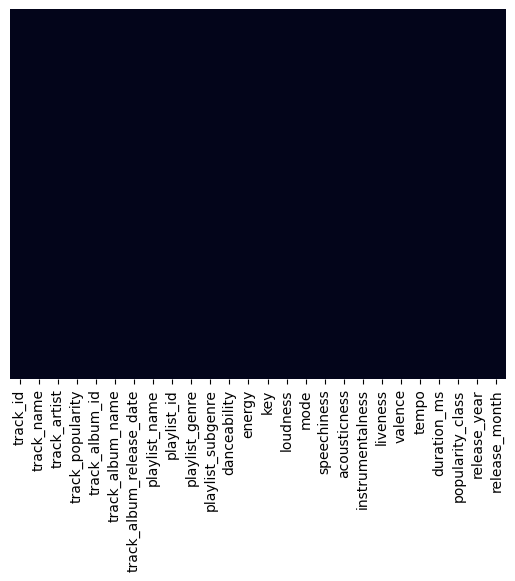

In [ ]:
#missing values matrix by seaboran
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

according to the heatmap, we cannot see any missing data. therefore, I will try to check this with a code instead.

In [ ]:
clean_df = df.copy()

print("📊 Missing values per column:")
print(clean_df.isnull().sum().sort_values(ascending=False))

📊 Missing values per column:
track_album_name            14
track_name                  10
track_artist                 8
track_id                     0
track_popularity             0
track_album_id               0
track_album_release_date     0
playlist_name                0
playlist_id                  0
playlist_genre               0
playlist_subgenre            0
danceability                 0
energy                       0
key                          0
loudness                     0
mode                         0
speechiness                  0
acousticness                 0
instrumentalness             0
liveness                     0
valence                      0
tempo                        0
duration_ms                  0
popularity_class             0
release_year                 0
release_month                0
dtype: int64


In [ ]:
# there are no missing values in the continous categories data

# Categorical: fill with mode
cat_cols = clean_df.select_dtypes(include="object").columns
for c in cat_cols:
    if clean_df[c].isnull().sum() > 0:
        clean_df[c] = clean_df[c].fillna(clean_df[c].mode()[0])

In [ ]:
# Sanity check
print("📊 Missing values per column:")
print(clean_df.isnull().sum().sort_values(ascending=False))

print("\n✅ Missing values handled.")

📊 Missing values per column:
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
popularity_class            0
release_year                0
release_month               0
dtype: int64

✅ Missing values handled.


# Moving on to Outliers

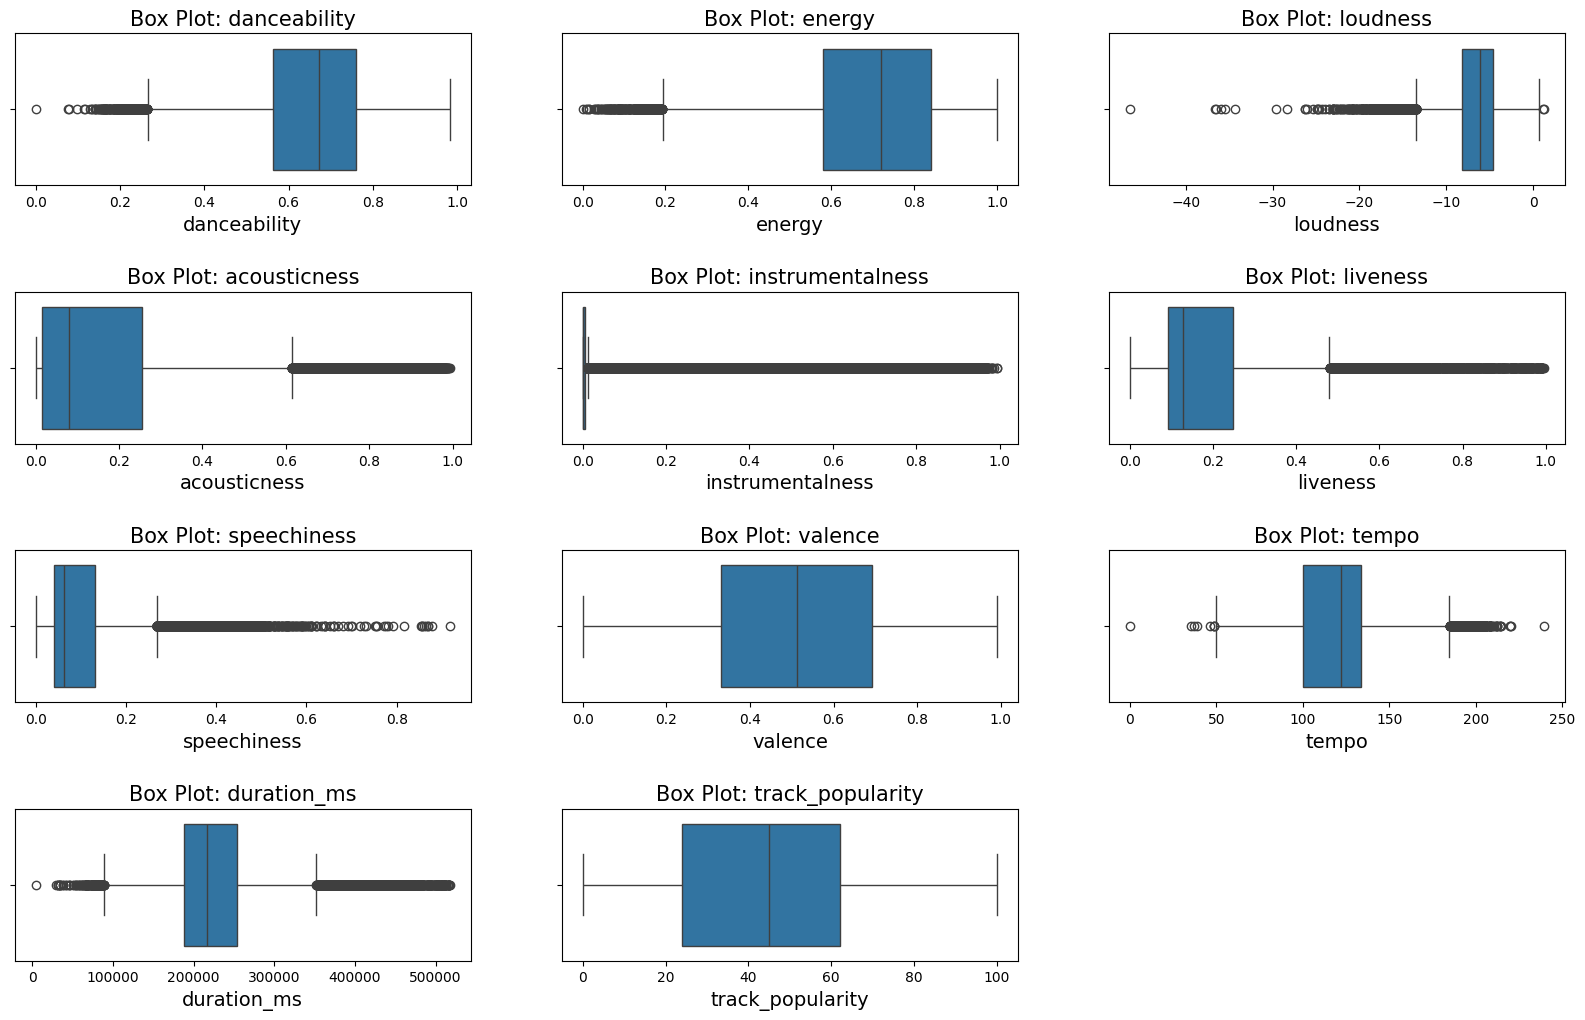

In [ ]:
## Using box (Wiskers) plot
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):

            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)

# call the function using the con_df which only has the continous veriables
outliers_boxplot(con_df)

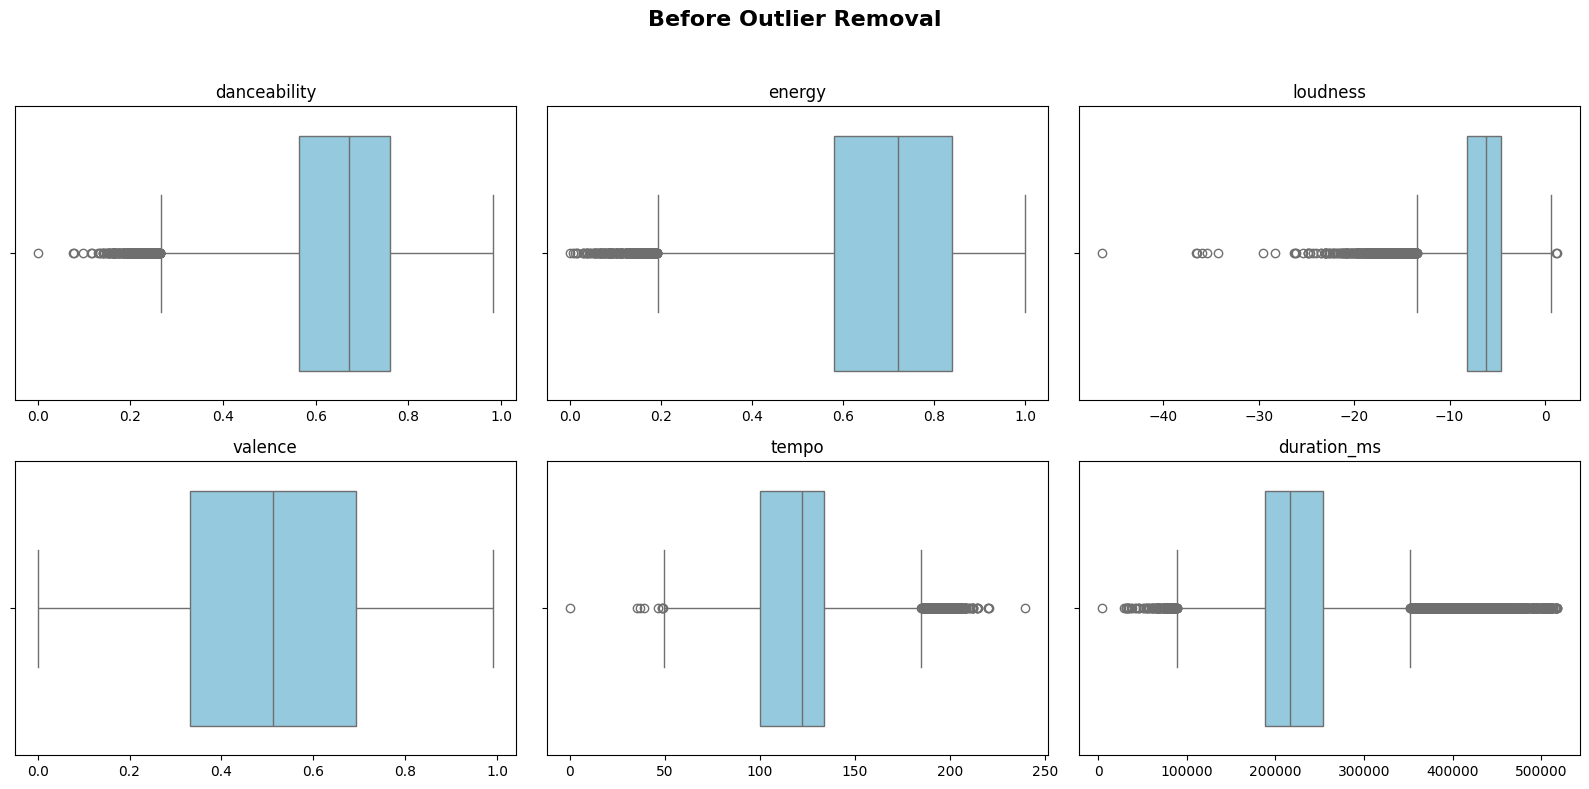

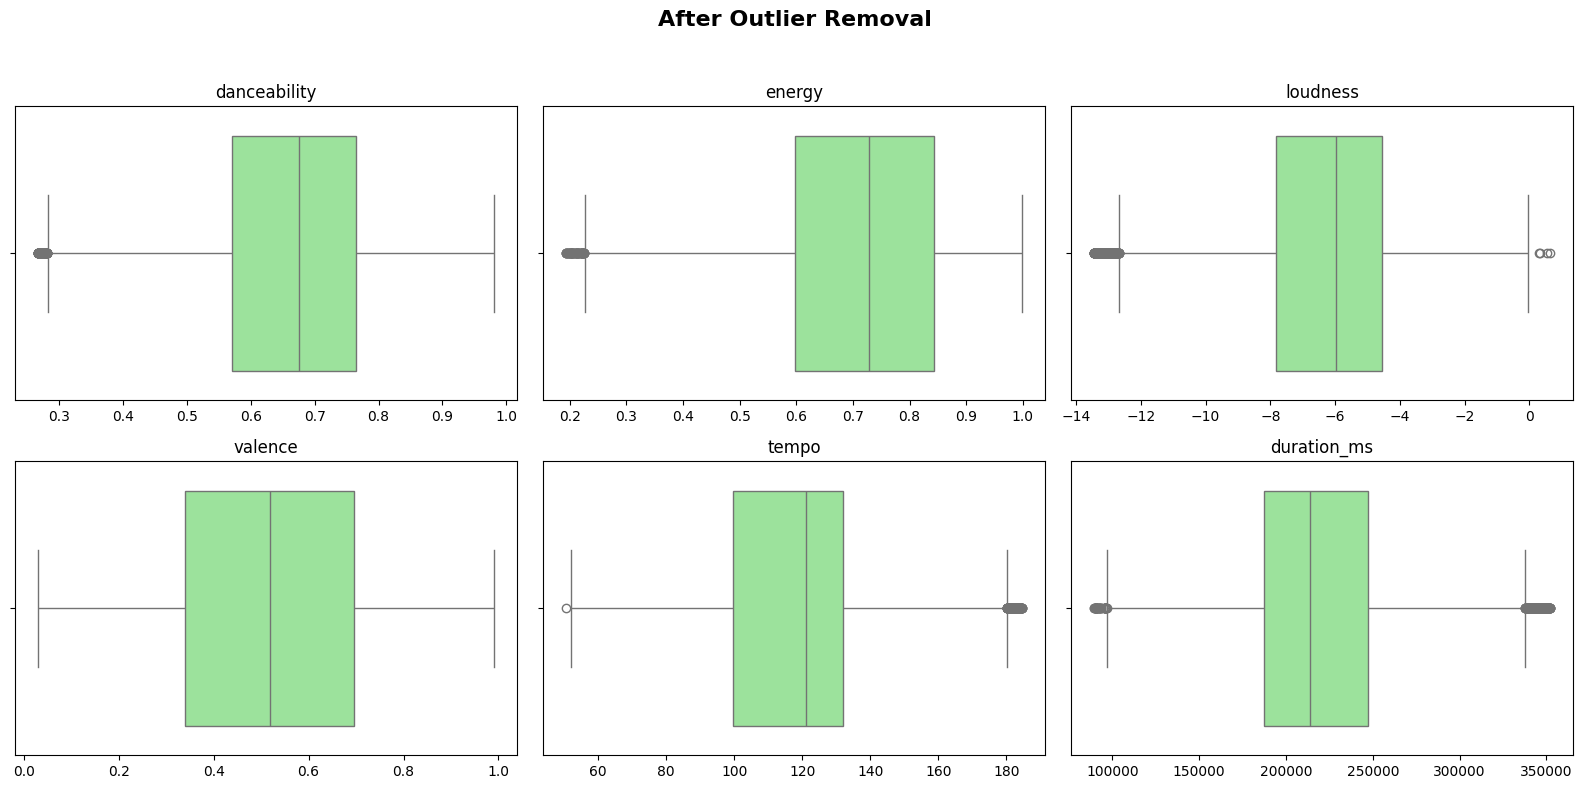

Final missing values count: 32
Final dataset shape: (29729, 26)
💾 Saved as Spotify_cleaned_stage3.csv


In [ ]:
# Detect and Handle Outliers (IQR method)
def remove_outliers_iqr(df, cols, factor=1.5):
    """
    Remove rows with numeric values outside the IQR bounds.
    """
    mask = pd.Series(True, index=df.index)
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - factor*IQR, Q3 + factor*IQR
        mask &= df[col].between(lower, upper)
    return df[mask]

# Visualize before/after for a few key features
key_feats = ['danceability','energy','loudness','valence','tempo','duration_ms']
key_feats = [f for f in key_feats if f in clean_df.columns]

# --- Before outlier removal ---
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle("Before Outlier Removal", fontsize=16, fontweight='bold')

for ax, feat in zip(axes.flat, key_feats):
    sns.boxplot(x=df[feat], color='skyblue', ax=ax)
    ax.set_title(feat)
    ax.set_xlabel("")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- Apply IQR rule ---
clean_df = remove_outliers_iqr(df, key_feats, factor=1.5)

# --- After outlier removal ---
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle("After Outlier Removal", fontsize=16, fontweight='bold')

for ax, feat in zip(axes.flat, key_feats):
    sns.boxplot(x=clean_df[feat], color='lightgreen', ax=ax)
    ax.set_title(feat)
    ax.set_xlabel("")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Sanity Check
print("Final missing values count:", clean_df.isnull().sum().sum())
print("Final dataset shape:", clean_df.shape)

# Save cleansed data
clean_df.to_csv("Spotify_cleaned_stage3.csv", index=False)
print("💾 Saved as Spotify_cleaned_stage3.csv")

# ✅Finished Data Cleansing, on to One-Hot Encoding